<h1>Fraud detection challenge</h1>
<b>Objective:</b> To predict fraud --> binary classification problem

For the resolution of this challenge, a serial of tasks have been carried out:

*Please note that unfortunately link references do not work in GitHub*

1. [Data Analysis:](#1) Analysis of dataset characteristics, feature analysis, outlier detection & removal.
    1. [Dataset summary:](#1.A) Main characteristics of the dataset.
    2. [Feature visualization:](#1.B) Observe feature contribution to the prediction.
    3. [Outlier detection & removal:](#1.C) Using Z-Score to remove outliers.
    
2. [Feature Engineering:](#2) Feature preprocessing, transformation, arranging, scaling.
    1. [Feature preprocessing:](#2.A) Feature engineering for transforming feature types to processable data. As well, data transformation for new possible features.
    2. [Feature scaling:](#2.B) Scaling all features.
3. [Model training:](#3) Necessary steps for building and optmizing a model.
    1. [Metrics:](#3.A) Metric selection.
    2. [Dataset split:](#3.B) Techniques against dataset imbalance.
    2. [Algorithm tuning:](#3.C) Hyper parameter optimization.
4. [Result comparision:](#4) Results
5. [Conclusion](#5)



<div id="1"></div>
<h2>1. Dataset Visualization</h2>
In order to understand the nature of the data, we need to visualize it. First, its important to see the feature types and their meanings:



In [2]:
import pandas as pd
pd.set_option('max_colwidth', 500)

# load the raw dataset
def load_data():
    global data, data_tags
    data = pd.read_csv('./dataset/fraud_data.csv')
    data_tags = pd.read_csv('./dataset/Data_dictionary.csv')
    pd.set_option('display.max_columns', 100)
    data = pd.read_csv('./dataset/fraud_data.csv')

data = None
data_tags = None

load_data()
data_tags

name  \
0        BESTELLIDENT    
1       TARGET_BETRUG    
2             B_EMAIL    
3           B_TELEFON    
4          B_GEBDATUM    
5    FLAG_LRIDENTISCH    
6     FLAG_NEWSLETTER    
7           Z_METHODE    
8          Z_CARD_ART    
9        Z_CARD_VALID    
10        Z_LAST_NAME    
11                Oder   
12           TAG_BEST    
13          TIME_BEST    
14           ANZ_BEST    
15           CHK_LADR    
16           CHK_RADR    
17            CHK_KTO    
18           CHK_CARD    
19         CHK_COOKIE    
20             CHK_IP    
21          FAIL_LPLZ    
22          FAIL_LORT    
23  FAIL_LPLZORTMATCH    
24          FAIL_RPLZ    
25          FAIL_RORT    
26  FAIL_RPLZORTMATCH    
27       SESSION_TIME    
28           NEUKUNDE    
29       ANZ_BEST_GES    
30      WERT_BEST_GES    
31        DATUM_LBEST    
32           MAHN_AKT    
33       MAHN_HOECHST    

                                                                                Description  
0                                                                                  Order ID  
1                                                                   Target variable (Fraud)  
2                          Did the customer provide his email address? (ja = yes nein = no)  
3                           Did the customer provide his phone number? (ja = yes nein = no)  
4                             Did the customer provide his birth date? (ja = yes nein = no)  
5                          Are delivery and billing address identical? (ja = yes nein = no)  
6                         Did the customer sign up for the newsletter? (ja = yes nein = no)  
7                                                                            Payment method  
8                                                                          Credit card type  
9                                                                    Credit card valid date  
10           Are name on payment metho and shipping address identical? (ja = yes nein = no)  
11                                                             amount\tBestellwert in Euro   
12                                                                             Day of order  
13                                                                            Time of order  
14                                                                  Number of ordered items  
15    Was there an oder with same shipping address in the last 3 days? (ja = yes nein = no)  
16     Was there an oder with same billing address in the last 3 days? (ja = yes nein = no)  
17     Was there an oder with same banking account in the last 3 days? (ja = yes nein = no)  
18  Was there an oder with same credit card number in the last 3 days? (ja = yes nein = no)  
19      Was there an oder with same browser cookie in the last 3 days? (ja = yes nein = no)  
20          Was there an oder with same browser IP in the last 3 days? (ja = yes nein = no)  
21                                Shipping address - ZIP Code unknown? (ja = yes nein = no)  
22                                   Shipping address - cirty unknown? (ja = yes nein = no)  
23                  Shipping address - ZIP Code and city do not match? (ja = yes nein = no)  
24                                 Billing address - ZIP Code unknown? (ja = yes nein = no)  
25                                    Billing address - cirty unknown? (ja = yes nein = no)  
26                   Billing address - ZIP Code and city do not match? (ja = yes nein = no)  
27                                                           Duration of session in minutes  
28                                     is the customer a new customer? (ja = yes nein = no)  
29                                         Total number of ordered items in previous orders  
30                                                         Total value from previous orders  
31                                                                       Date of last order  
32   

In [4]:
load_data()

# Obtain dataset dimension and balance
Nsamples, Nfeatures = data.shape
Nfeatures = Nfeatures - 1 
fraudCount = len(data[data['TARGET_BETRUG'] == 'ja'])
noFraudCount = len(data[data['TARGET_BETRUG'] == 'nein'])
nanPercentaje =  (data.isna().sum().sum()*1.)/ (Nsamples*Nfeatures*1.) *100
print('Dataset dimensionality: %d samples of dimensionality %d (#features)' %  (Nsamples,Nfeatures))
print('Fraud samples: %d ( %.4f %% ), noFraud samples: %d ( %.4f %% ) ' % (fraudCount, fraudCount*1.0/Nsamples * 100., noFraudCount, noFraudCount*1.0/Nsamples * 100.))
print('A %.2f %% of the values is are missing (NaN)' % nanPercentaje)
data.head(15)

Dataset dimensionality: 30000 samples of dimensionality 32 (#features)
Fraud samples: 1746 ( 5.8200 % ), noFraud samples: 28254 ( 94.1800 % ) 
A 8.75 % of the values is are missing (NaN)


TARGET_BETRUG B_EMAIL B_TELEFON  B_GEBDATUM FLAG_LRIDENTISCH  \
0           nein      ja      nein  1973-01-17               ja   
1           nein      ja        ja  1970-12-08             nein   
2           nein      ja      nein  1972-04-03               ja   
3           nein    nein        ja  1966-08-01               ja   
4           nein      ja        ja  1969-12-21               ja   
5           nein    nein      nein  1975-01-20             nein   
6           nein      ja      nein  1978-02-03               ja   
7           nein    nein      nein  1985-07-21               ja   
8           nein      ja      nein  1953-05-21             nein   
9             ja    nein      nein  1978-10-02               ja   
10          nein    nein      nein         NaN             nein   
11          nein    nein      nein  1965-07-09               ja   
12          nein      ja      nein         NaN               ja   
13          nein    nein      nein  1964-09-08               ja   
14          nein      ja      nein  1964-08-22             nein   

   FLAG_NEWSLETTER    Z_METHODE Z_CARD_ART  Z_CARD_VALID Z_LAST_NAME  \
0               ja     Rechnung        NaN        5.2006         NaN   
1             nein  Kreditkarte       Visa       12.2007          ja   
2             nein     Rechnung        NaN       12.2007         NaN   
3             nein     Rechnung        NaN        1.2007         NaN   
4             nein  Kreditkarte   Eurocard       12.2006          ja   
5             nein  Kreditkarte   Eurocard        2.2007          ja   
6             nein     Rechnung        NaN       11.2007         NaN   
7             nein     Rechnung        NaN        5.2005         NaN   
8             nein  Kreditkarte       Visa        9.2007          ja   
9             nein     Rechnung        NaN       11.2006         NaN   
10            nein  Kreditkarte   Eurocard        1.2007          ja   
11            nein     Rechnung        NaN        2.2006         NaN   
12            nein     Rechnung        NaN        6.2006         NaN   
13            nein     Rechnung        NaN       11.2007         NaN   
14            nein  Kreditkarte   Eurocard        3.2007          ja   

    WERT_BEST TAG_BEST TIME_BEST  ANZ_BEST CHK_LADR CHK_RADR CHK_KTO CHK_CARD  \
0       17.80       Sa  09:13:00         1     nein     nein    nein     nein   
1       18.20       Mi  17:36:00         1     nein     nein    nein     nein   
2       10.80       Fr  11:13:00         1     nein     nein    nein     nein   
3       54.50       Fr  02:07:00         1     nein     nein    nein       ja   
4       19.99       Di  23:46:00         1     nein     nein    nein     nein   
5       22.95       Sa  13:13:00         1     nein     nein    nein     nein   
6        9.80       Do  14:43:00         1     nein     nein    nein     nein   
7       17.50       So  08:51:00         1     nein     nein    nein     nein   
8        9.99       So  16:17:00         1     nein     nein    nein     nein   
9       57.80       Fr  16:43:00         1     nein     nein    nein     nein   
10     168.19       Mo  08:25:00         4     nein     nein    nein     nein   
11      18.20       Mi  02:49:00         1     nein     nein    nein     nein   
12      68.80       Mo  11:44:00         2     nein     nein    nein     nein   
13      19.99       So  04:58:00         1     nein     nein    nein     nein   
14      54.50       Mo  00:08:00         1     nein     nein    nein     nein   

   CHK_COOKIE CHK_IP FAIL_LPLZ FAIL_LORT FAIL_LPLZORTMATCH FAIL_RPLZ  \
0        nein   nein      nein      nein              nein      nein   
1        nein   nein      nein      nein              nein        ja   
2        nein   nein      nein      nein              nein      nein   
3        nein   nein      nein      nein              nein      nein   
4        nein   nein      nein      nein              nein      nein   
5        nein   nein      nein      nein        

<div id="1.A"></div>
<h3>1.A Dataset summary</h3>

* The **Features Types** are mostly labeled data (*ja, nein, categories*) and numerical (*dates,  values*).
* **Dataset dimensionality:** 30000 samples of dimensionality 33 (#features).
* **Dataset balance:** The dataset is higly imbalanced:
    1. Fraud samples: 1746 ( 5.82 % )
    2. noFraud samples: 28254 ( 94.18 % )
* **Dataset quality:** A 8% of the the dataset are missing (null). That shows uncompleteness since many fields like *Z_CARD_ART* present missing values (*NaN*). However all the samples have an output label (*TARGET_BETRUG*: boolean ∈ {ja,nein})


**Note:** As well, the labels *BESTELLIDENT & *Order* from the tags description are not actually in the features, and *WERT_BEST* is present in the features but not in the description. That is because *"Order"*  it's called *WERT_BEST* 


<div id="1.B"></div>
<h3>1.B Feature Visualization</h3>
    
Study of how a feature contributes to the prediction. 

**Linear feature visualization**: The numerical features *WERT_BEST, WERT_BEST_GES, SESSION_TIME* were visualized. It can be observed how there is a fraud trend in a range of values:
* WERT_BEST: (0, 100) €
* WERT_BEST_GES: (0, 100) €
* SESSION_TIME: (5, 15) €
* ANZ_BEST_GES: 1 ordered item

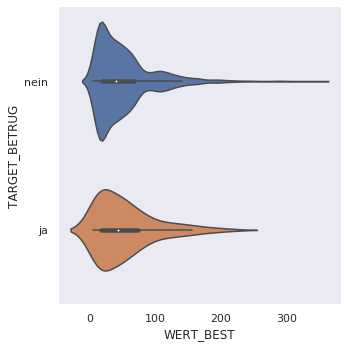

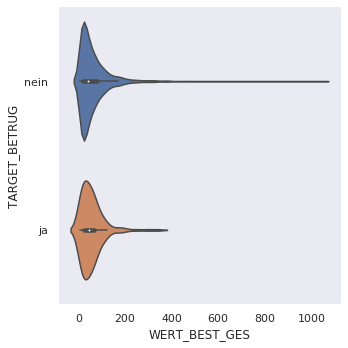

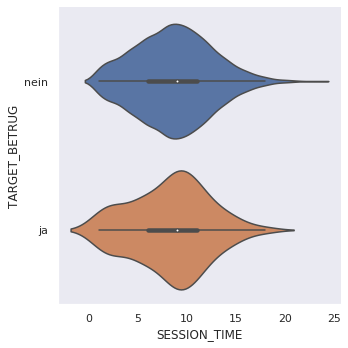

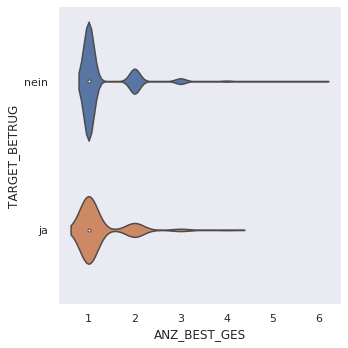

In [48]:
def visualize_numerical_feature(tag):
    global data
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    feature = data.dropna()
    sns.set(style="dark", color_codes=True)
    sns.catplot(tag, data=feature.dropna(), y="TARGET_BETRUG",kind="violin" )
    plt.show()
        
load_data()
numerical_features=['WERT_BEST','WERT_BEST_GES','SESSION_TIME','ANZ_BEST_GES' ]

for tag in numerical_features:
    visualize_numerical_feature(tag)

**order-relevant Categorical features**: Categories that need an order to have meaning. The following trends were found:
* TAG_BEST: At the weekend [Sa, Mo]
* MAHN_AKT: [NaN, 0.0]
* MAHN_HOECHST: [NaN, 0.0]

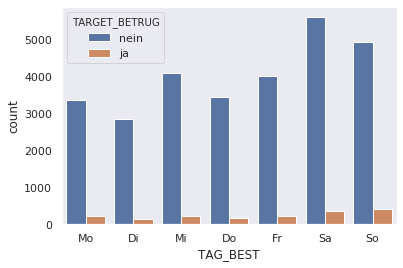

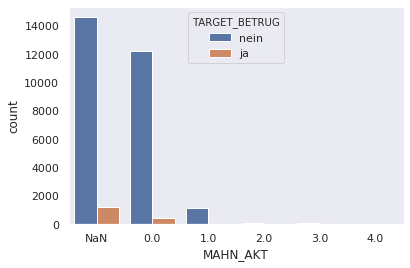

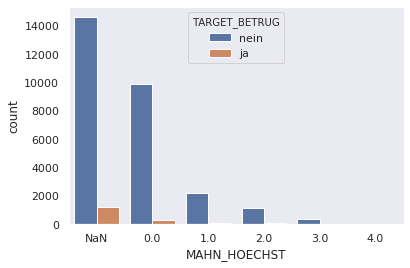

In [56]:
def visualize_ordered_categorical_feature(tag,order):
    global data
    
    feature = data.fillna('NaN')
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="dark", color_codes=True)
    sns.countplot(tag,data=feature,hue='TARGET_BETRUG',order=order)
#     plt.yscale('log')
    plt.show()

ordered_categorical_features = [
    ('TAG_BEST',['Mo','Di', 'Mi', 'Do','Fr','Sa','So']),
    ('MAHN_AKT',['NaN',0.,1.,2.,3.,4.]),
    ('MAHN_HOECHST',['NaN',0.,1.,2.,3.,4.])
    ]
for tag,order in ordered_categorical_features:
    visualize_ordered_categorical_feature(tag, order)

**Categorical features**:  It has been taken into account *NaN* as a category. As shown in the plots, a missing value contributes to the prediction as well so *NaN* should not be removed nor directly replaced by 0.

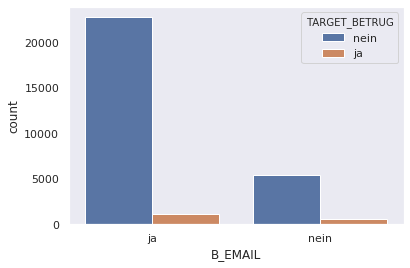

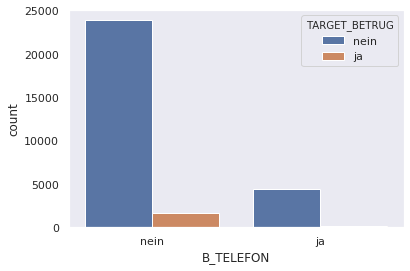

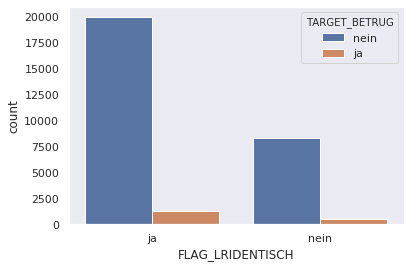

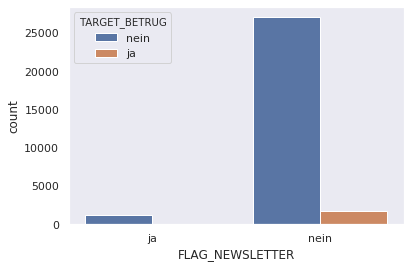

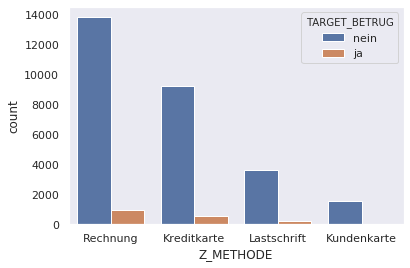

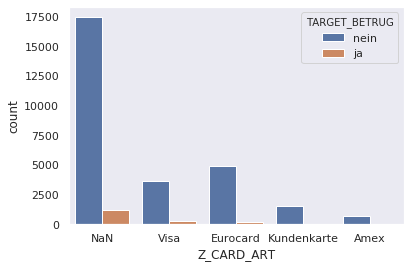

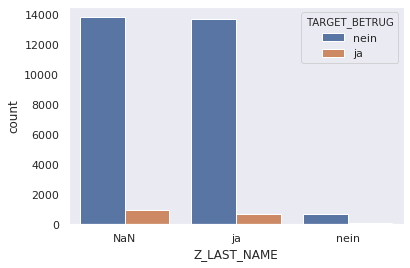

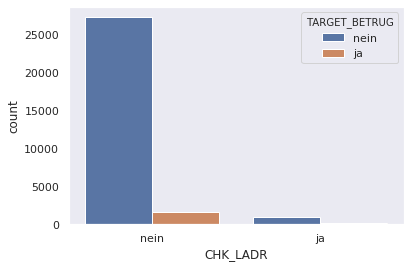

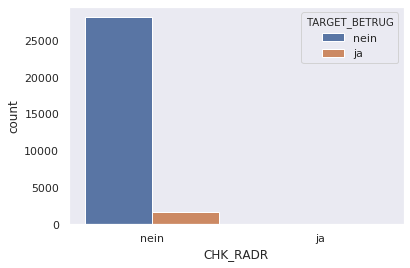

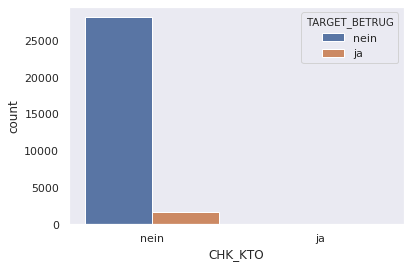

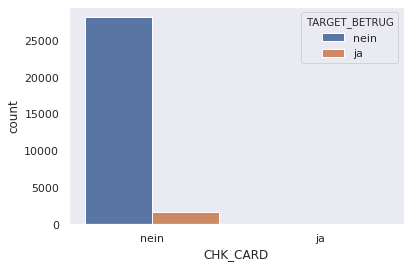

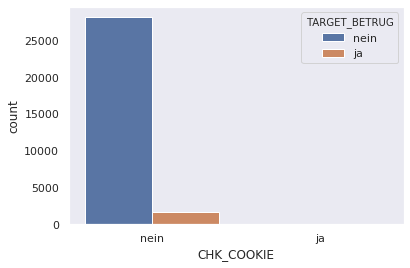

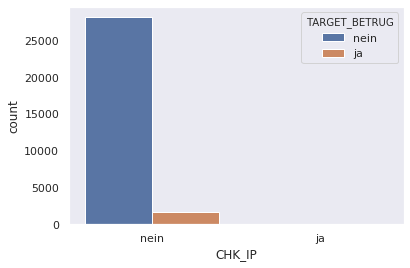

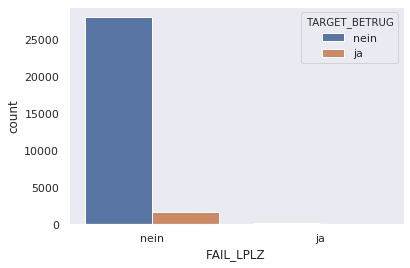

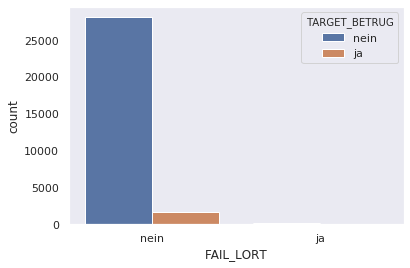

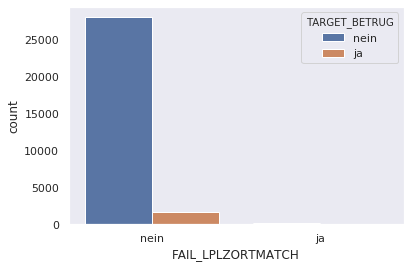

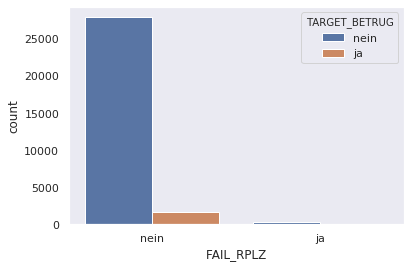

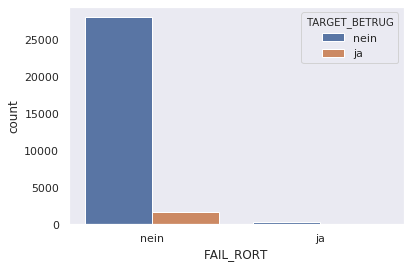

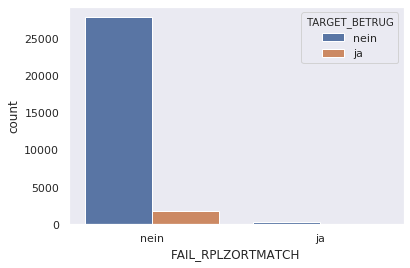

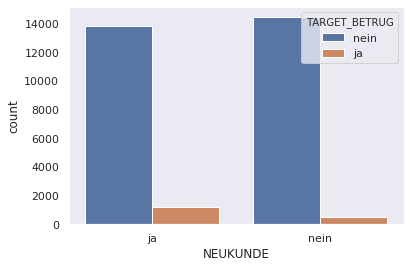

In [57]:
def visualize_categorical_feature(tag):
    global data
    
    feature = data.fillna('NaN')
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(style="dark", color_codes=True)
    sns.countplot(tag,data=feature,hue='TARGET_BETRUG')
#     plt.yscale('log')
    plt.show()

categorical_features = ['B_EMAIL','B_TELEFON','FLAG_LRIDENTISCH','FLAG_NEWSLETTER','Z_METHODE','Z_CARD_ART','Z_LAST_NAME','CHK_LADR','CHK_RADR','CHK_KTO','CHK_CARD','CHK_COOKIE','CHK_IP','FAIL_LPLZ','FAIL_LORT','FAIL_LPLZORTMATCH','FAIL_RPLZ','FAIL_RORT','FAIL_RPLZORTMATCH','NEUKUNDE',]
for tag in categorical_features:
    visualize_feature(tag)

<div id="1.C"></div>
<h3>1.C Outlier Detection and Removal</h3>
The feature <i>WERT_BEST_GES</i> was subject to study. Its values have a range of [0, 1047] a mean of 29.88, and a std dev of 57.38. 
<p>
When observing the frequence of it's ocurrences in a histogram, it can be seen that the vast majority of values are between [0, 200]. However, values like 1000 are still in the dataset with a rare frequence. Those are outliers.




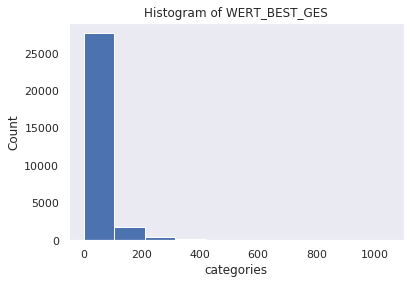

Feature 'WERT_BEST_GES' 's values have a range of [0, 1047] a mean of 29.88 and a std dev of 57.38


In [4]:
def analyse_feature(tag):
    global data
    
    feature = data[tag]
    min_ = feature.min()
    max_ = feature.max()
    mean_ = feature.mean()
    std_ = feature.std()

    import matplotlib.pyplot as plt
    plt.hist(feature)
    # plt.yscale('log')
    plt.title('Histogram of ' +tag)
    plt.xlabel('categories')
    plt.ylabel('Count')
    plt.show()
    print("Feature 'WERT_BEST_GES' 's values have a range of [%d, %d] a mean of %.2f and a std dev of %.2f" % (min_,max_, mean_, std_))

analyse_feature('WERT_BEST_GES')

In order to detect those ouliers, the **Z-Score** metric has been used with a threshold=3. This metric shows how far from the mean is a sample taking standard deviation as a unit


In [5]:
import numpy as np
from scipy import stats

def remove_outliers(z_score_threshold=3):
    global data

    subdata =data['WERT_BEST_GES']
    z = np.abs(stats.zscore(subdata))
    outliers= np.where(z > z_score_threshold)
    subdata = subdata[(z < z_score_threshold)]
    data = data.drop(data.index[outliers])

# load_data()
# remove_outliers()

<div id="2"></div>
<h2>2. Feature Engineering</h2>
<div id="2.A"></div>
<h3>2.A Feature Preprocessing</h3>

The dataset contains non-understandable feature values for the models such as categories, dates... In order to make them "processable", they need to be transformed depending on the type of each one.

Feature types:

1. **Booleans**: ja/nein
2. **Numerical**: Amounts
3. **Numerical with nan**:
4. **Categories with and without nan**: Nan is counted as another categorie. Card types, payment methods...
5. **Times**: Time stamps. Hour of the transaction
6. **Dates**: ja/nein
7. **Dates with nan**: ja/nein

In order to make the different types of features (categorical, dates, number of days, boolean...)  "understandable" for the model, the following conversions have been carried out:

* **Date conversion** to ordinal, to days of week
* **Categorical data to numerical**: Transform categories into one-hot encoded labeled data.
    * For order-rellevant categories, there's no one-hot encoding but ordered label encoding. (E.g *day of the week*)
* **NaN replacement**: For those numerical features, a new boolean feature is created for wether the value was missing or not. In the original column, NaNs are replaced by the mean value of the column. In this way, we still have the information that the feature was missing and the NaN values are replaced by a value that does not bias the data.  



In [6]:
# ja/nein to 1/0   
def boolean_to_binary(tags):
    global data
    for tag in tags:
        # ja to 1, nein to 0
        data[tag] = data[tag].replace('ja',1)
        data[tag] = data[tag].replace('nein',0)

# timestamp date to ordinal
def datesToOrdinalDates(tags):
    global data
    for tag in tags:
        # dates to  ordinal dates
        data[tag] = data[tag].apply(lambda timestamp: 0 if pd.isna(timestamp) else pd.Timestamp(timestamp).date().toordinal() )

# unordered categories --> create a new boolean column (counting nan as a category)
def onehot_encode(tags):
    global data
    for tag in tags:
        dummies = pd.get_dummies(data[tag], dummy_na=True).add_prefix(tag+'-')
        data = data.join(dummies)
        data.pop(tag)

# numerical with NaN --> create new boolean feature for nan & set mean to nans
def numerical_nan_impute(tags):
    global data
    for tag in tags:
        data.loc[:,tag+'-isnan'] = data[tag].isna().apply(lambda x: 1 if x == True else 0)
        data[tag] = data[tag].fillna(data[tag].mean())

# [not used] ensure there is no NaN
def replaceNan():
    global data
    data = data.fillna(0)

# [not used] categories to unordered ints
def categoricalToNumerical():
    global data
    #categorical to numerical
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data = data.astype(str).apply(le.fit_transform)

# Just for developer agility
def reduceData(percentage):
    global data, Nsamples
    data = data.sample(n=int(Nsamples/percentage))

# replace categories for ordered ints
def ordered_labels(tag, order):
    global data
    for day,i in zip(order, range(0,len(order))):
        data[tag] = data[tag].replace(day,i)                

In [7]:
load_data()
data.head()

TARGET_BETRUG B_EMAIL B_TELEFON  B_GEBDATUM FLAG_LRIDENTISCH  \
0          nein      ja      nein  1973-01-17               ja   
1          nein      ja        ja  1970-12-08             nein   
2          nein      ja      nein  1972-04-03               ja   
3          nein    nein        ja  1966-08-01               ja   
4          nein      ja        ja  1969-12-21               ja   

  FLAG_NEWSLETTER    Z_METHODE Z_CARD_ART  Z_CARD_VALID Z_LAST_NAME  \
0              ja     Rechnung        NaN        5.2006         NaN   
1            nein  Kreditkarte       Visa       12.2007          ja   
2            nein     Rechnung        NaN       12.2007         NaN   
3            nein     Rechnung        NaN        1.2007         NaN   
4            nein  Kreditkarte   Eurocard       12.2006          ja   

   WERT_BEST TAG_BEST TIME_BEST  ANZ_BEST CHK_LADR CHK_RADR CHK_KTO CHK_CARD  \
0      17.80       Sa  09:13:00         1     nein     nein    nein     nein   
1      18.20       Mi  17:36:00         1     nein     nein    nein     nein   
2      10.80       Fr  11:13:00         1     nein     nein    nein     nein   
3      54.50       Fr  02:07:00         1     nein     nein    nein       ja   
4      19.99       Di  23:46:00         1     nein     nein    nein     nein   

  CHK_COOKIE CHK_IP FAIL_LPLZ FAIL_LORT FAIL_LPLZORTMATCH FAIL_RPLZ FAIL_RORT  \
0       nein   nein      nein      nein              nein      nein      nein   
1       nein   nein      nein      nein              nein        ja      nein   
2       nein   nein      nein      nein              nein      nein      nein   
3       nein   nein      nein      nein              nein      nein      nein   
4       nein   nein      nein      nein              nein      nein      nein   

  FAIL_RPLZORTMATCH  SESSION_TIME NEUKUNDE  ANZ_BEST_GES  WERT_BEST_GES  \
0              nein             8       ja             0           0.00   
1              nein            13       ja             0           0.00   
2              nein             3       ja             0           0.00   
3              nein            11     nein             4          75.72   
4              nein            16       ja             0           0.00   

  DATUM_LBEST  MAHN_AKT  MAHN_HOECHST  
0         NaN       NaN           NaN  
1         NaN       NaN           NaN  
2         NaN       NaN           NaN  
3  2002-05-12       0.0           0.0  
4         NaN       NaN           NaN

In [8]:
def feature_engineering():

    # 1. ja/nein --> boolean conversion
    bool_noNan_tags = ['TARGET_BETRUG','B_EMAIL','B_TELEFON','FLAG_LRIDENTISCH','FLAG_NEWSLETTER', 'CHK_LADR','CHK_RADR','CHK_KTO','CHK_CARD','CHK_COOKIE','CHK_IP','FAIL_LPLZ','FAIL_LORT','FAIL_LPLZORTMATCH','FAIL_RPLZ','FAIL_RORT','FAIL_RPLZORTMATCH', 'NEUKUNDE']
    boolean_to_binary(bool_noNan_tags)

    # 2. numerical --> they are fine
    numerical_noNan = ['WERT_BEST','ANZ_BEST','SESSION_TIME','ANZ_BEST_GES','WERT_BEST_GES']

    # 3. numerical with nan --> create new feature with nan boolean, replace nan for mean
    numerical_nan_tags = ['MAHN_AKT', 'MAHN_HOECHST' ]
    numerical_nan_impute(numerical_nan_tags)

    # 4. categories with/without nan --> onehot encoding, nan is a new category
    categorical_nan_tags = [ 'Z_METHODE','Z_CARD_ART','Z_LAST_NAME']
    onehot_encode(categorical_nan_tags)
    
    # ordered_labels = ['TAG_BEST']
    day_order = ['Mo','Di','Mi','Do','Fr','Sa','So']
    ordered_labels('TAG_BEST', day_order)

    # 5. times --> just keep the hours
    time = ['TIME_BEST']
    global data
    data['TIME_BEST'] = pd.to_datetime(data['TIME_BEST']) #
    data['TIME_BEST'] = data['TIME_BEST'].apply(lambda v: v.time().hour if not pd.isna(v) else 0 )

    # 6. dates --> to ordinal 
#     date_noNan_tags=['Z_CARD_VALID']
#     data['Z_CARD_VALID'] = pd.to_datetime(data['Z_CARD_VALID']) 
#     data['Z_CARD_VALID'] = data['Z_CARD_VALID'].apply(lambda v: v.time().hour if not pd.isna(v) else 0 )

    # 7. dates with nan
    dates_tags= ['B_GEBDATUM', 'DATUM_LBEST', 'Z_CARD_VALID']
    datesToOrdinalDates(dates_tags)
# load_data()
# feature_engineering()
# data.head()

<div id="2.B"></div>
<h3>2.B Feature Scaling</h3>
In order to avoid feature related biases, each feature has been scaled regarding its ranges.

In [9]:
def feature_scaling():
    global data
       
    data -= data.min()
    data /=  (data.max()-data.min())
    
#     label = data['TARGET_BETRUG']
#     data -= data.mean()
#     data /=  data.std()
#     data['TARGET_BETRUG'] = label

    replaceNan()
    
# load_data()
# feature_engineering()
# feature_scaling()
# data.head()

<div id="3"></div>
<h2>3. Model Training</h2>
    
The nature of the prediction is a binary classification. **Logistic Regression** and **(Random) Decision Trees** have been subject of study.
<div id="3.A"></div>
<h3>3.A Metrics</h3>
Since the dataset is highly imbalanced (5.82% are tagged as fraud and 94.18% are taged as not fraud),the score *accuracy* would hide the main objective of the challenge (to detect fraud) since we could achieve a 94.18 % precision by just labbeling all the samples as no fraud.

For actually measuring the quaity of the predictions, it has to be taken into account the *sensitivity* or **True Positive Rate** and **False Positive Rate**. For that, the metric **AUC-ROC** measure the degree of separability, that means how much model can distinguish between fraud samples or not fraud.
<div id="3.B"></div>
<h3>3.B Dataset split</h3>
It has been used a Training set of 80% of the samples and 20% for testing.

```x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=0)
```
As well, in order to deal with the data imbalance, techniques of *data undersampling* and *oversampling* have been carried out to obtain the same proportion of fraud/no_fraud samples.
The technic which showed a better performance was *oversampling.*

In [10]:

# Just spliting labels & features
def dataset_split(methode):
    
    global data
    # Class counts
    count_no_fraud, count_fraud = data['TARGET_BETRUG'].value_counts()

    # Division
    df_no_fraud = data[data['TARGET_BETRUG'] == 0]
    df_fraud = data[data['TARGET_BETRUG'] == 1]
    
    global labels_balanced
    global features_balanced
    
    if methode == 'undersampling':
        # undersample
        df_no_fraud_under = df_no_fraud.sample(count_fraud)
        data_under = pd.concat([df_no_fraud_under, df_fraud], axis=0)

        labels_balanced = data_under.pop('TARGET_BETRUG').values
        features_balanced = data_under.values
    
    elif methode == 'oversampling':
        # oversample
        df_fraud_over = df_fraud.sample(count_no_fraud, replace=True)
        data_over = pd.concat([df_no_fraud, df_fraud_over], axis=0)

        labels_balanced = data_over.pop('TARGET_BETRUG').values
        features_balanced = data_over.values
        
    
    # feature/label separation
    global labels
    global features
    labels = data.pop('TARGET_BETRUG').values
    features = data.values
    
# load_data()
# feature_engineering()
# feature_scaling()
# print(data['TARGET_BETRUG'].value_counts())
# dataset_split('oversampling')

<div id="3.C"></div>
<h3>3.C Algorithm tuning</h3>

**GridSearchCV** is used for hyper parameter optimization with task parallelization. It is setted to optimize the *roc_auc* score. A cross validation with 5 folds to avoid overfitting. 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import numpy as np

def evaluateClassifiers():
    global best_classifiers
    best_classifiers= dict()

    classifiers = [
        {
            'clf': LogisticRegression(random_state=0),
            'grid_values': {
                "C": [0.1,0.5,1,2,3,5],
                "penalty":["l1","l2"],
                "class_weight":[{0:1,1:w} for w in [1,2,3,4]]
            }
        },
        {
            'clf': RandomForestClassifier(),
            'grid_values': {
                'n_estimators': [10,100,400], 
                'max_depth':[2,  10, 32] ,
                'min_samples_split': np.linspace(0.1, 1.0, 3, endpoint=True),
                'min_samples_leaf': np.linspace(0.1, 0.5, 3, endpoint=True)
            }
        },
        {
            'clf': DecisionTreeClassifier(),
            'grid_values': {
                'max_depth':[2, 5, 10, 32] ,
                'min_samples_split': np.linspace(0.1, 1.0, 3, endpoint=True),
                'min_samples_leaf': np.linspace(0.1, 0.5, 3, endpoint=True)
            }
        }
    ]
    
    global features
    global labels
    
    # defined here
    global x_train, x_test, y_train, y_test
   
    x_train, x_test, y_train, y_test = train_test_split(features_balanced, labels_balanced, test_size=0.20, random_state=0)

    for classifier in classifiers:
        print('-----')
        classif = classifier['clf']
        grid_values = classifier['grid_values']

        clf = GridSearchCV(classif, grid_values, scoring='roc_auc', n_jobs=-1, verbose=1, cv=5)
        clf.fit(x_train, y_train)

        name = clf.best_estimator_.__class__.__name__
        best_classifiers[name] = clf.best_estimator_
        print(name+ ': Achieved score %f ' % clf.best_score_, 'with params:', clf.best_params_)

<div id="4"></div>
<h2>4 Results comparison</h2>
To detect overfiting, the evaluation has been made for the train set and the test set.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,  roc_curve, roc_auc_score,balanced_accuracy_score
from tabulate import tabulate

import matplotlib.pyplot as plt

def plot_roc_curve(axe,fpr, tpr, threshold,title='roc auc'):
    roc_auc = auc(fpr, tpr)
    axe.title.set_text(title)
    axe.set_ylabel('tpr')
    axe.set_xlabel('fpr')
    axe.plot([0, 1], [0, 1],'r--')
    axe.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    axe.legend(loc='lower right')
    axe.set_aspect(aspect=1)
    

def compare_train_test_roc_curve(clf,showPlots=True):
    if showPlots:
        fig, axes = plt.subplots(1,2)
        fig.suptitle(clf.__class__.__name__)
        fig.tight_layout()
        fig.show()

    # roc auc curves (with probabilities prediction)
    pred_train = clf.predict_proba(x_train)[:,1]
    pred_test  = clf.predict_proba(x_test)[:,1]

    fpr_train, tpr_train, _ = roc_curve(y_train, pred_train )
    fpr_test, tpr_test, _   = roc_curve(y_test,pred_test )
    
    if showPlots:
        plot_roc_curve(axes[0], fpr_train, tpr_train, _, title='train set performance')
        plot_roc_curve(axes[1], fpr_test, tpr_test, _, title='test set performance')
    
    # scores
    scores = dict()
    
    # train - test
    scores['roc_auc'] = roc_auc_score(y_train,pred_train), roc_auc_score(y_test,pred_test)
    
    # predict classification
    pred_train = clf.predict(x_train) 
    pred_test = clf.predict(x_test) 

    scores['precision'] = precision_score(y_train, pred_train), precision_score(y_test, pred_test)
    scores['recall'] = recall_score(y_train, pred_train),recall_score(y_test, pred_test)
    scores['balanced_accuracy'] = balanced_accuracy_score(y_train, pred_train),balanced_accuracy_score(y_test, pred_test)
    
    print()    
    print(clf.__class__.__name__,':')
    print(tabulate([(metric, score_train, score_test) for metric, (score_train, score_test) in scores.items()],
                   headers=['metric', 'score_train', 'score_test']))
    
    return scores
        
def compare_classifiers(showPlots=True):
    global best_classifiers
    results = dict()
    for clfName, clf in best_classifiers.items():
        results[clfName] = compare_train_test_roc_curve(clf,showPlots)

    tuples = []
    headers=['algorithm','roc-auc','precision','recall','bal. accu.']
    for algorithm, metrics in results.items():
        tupla = [score for _, (_, score) in metrics.items()]
        tupla.insert(0,algorithm)
        tuples.append(tupla)
    print('')
    print(tabulate(tuples,headers=headers, tablefmt='pipe'))
    
    import pickle
    for name ,clf in best_classifiers.items():
        # save the classifier
        with open(name+'.pkl', 'wb') as fid:
            pickle.dump(clf, fid)    


# compare_classifiers(showPlots=False)


import pickle
for name ,clf in best_classifiers.items():
    # save the classifier
    with open(name+'.pkl', 'wb') as fid:
        pickle.dump(clf, fid)    

Run all the steps:

/home/room/miniconda3/envs/tf36/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



LogisticRegression :
metric               score_train    score_test
-----------------  -------------  ------------
roc_auc                 0.74739       0.75041
precision               0.664589      0.672549
recall                  0.734381      0.736447
balanced_accuracy       0.682818      0.685243


/home/room/miniconda3/envs/tf36/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



RandomForestClassifier :
metric               score_train    score_test
-----------------  -------------  ------------
roc_auc                 0.676271      0.680665
precision               0.57512       0.586301
recall                  0.720926      0.7275
balanced_accuracy       0.595521      0.601789


/home/room/miniconda3/envs/tf36/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



DecisionTreeClassifier :
metric               score_train    score_test
-----------------  -------------  ------------
roc_auc                 0.674378      0.677281
precision               0.65704       0.667015
recall                  0.572056      0.571301
balanced_accuracy       0.637489      0.640106

| algorithm              |   roc-auc |   precision |   recall |   bal. accu. |
|:-----------------------|----------:|------------:|---------:|-------------:|
| LogisticRegression     |  0.75041  |    0.672549 | 0.736447 |     0.685243 |
| RandomForestClassifier |  0.680665 |    0.586301 | 0.7275   |     0.601789 |
| DecisionTreeClassifier |  0.677281 |    0.667015 | 0.571301 |     0.640106 |


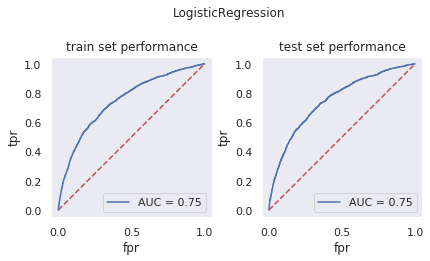

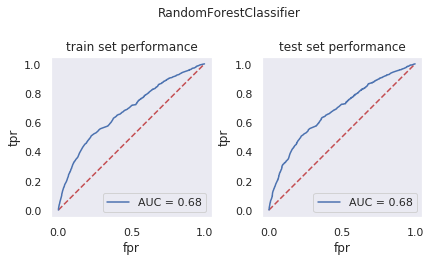

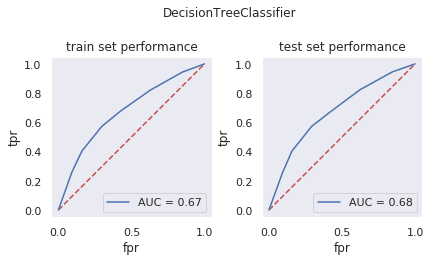

In [17]:
load_data()
remove_outliers()
feature_engineering()
feature_scaling()
dataset_split('oversampling')
evaluateClassifiers()
compare_classifiers(showPlots=True)


<div id="5"></div>
<h2>5. Conclusion</h2>
The algorithm and parameters which best performance showed is:

**LogisticRegression**:
* C = 1, 
* class_weight= {0: 1, 1: 1}
* penalty = l2



| algorithm              |   roc-auc |   precision |   recall |   bal. accu. |
|:-----------------------|----------:|------------:|---------:|-------------:|
| LogisticRegression     |  0.75041  |    0.672549 | 0.736447 |     0.685243 |
| RandomForestClassifier |  0.680665 |    0.586301 | 0.7275   |     0.601789 |
| DecisionTreeClassifier |  0.677281 |    0.667015 | 0.571301 |     0.640106 |

A data analysis was carried out to understand the nature of the problem which showed a data imbalance problem.

Feature engineering was performed to transform features into usefull and model-understandable values.

In order to deal with data imbalance, oversampling technic was used for balancing both classes.

Three algorithms for binary classigication were tested with hyper parameter optimization against a training set 
and a test set for verifying the results and detect overfitting.

<h3>4.1 Next steps</h3>
Proposed next steps for improving performance:

* Generate new features from existing features: E.g. operation between dates
* Generate new fraud samples with SMOTE oversampling [SMOTE](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)
* Try Gradient Boost Descent XGBoost [xgb](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn)



Imbalanced data references:

* https://towardsdatascience.com/detecting-financial-fraud-using-machine-learning-three-ways-of-winning-the-war-against-imbalanced-a03f8815cce9

* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
